opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


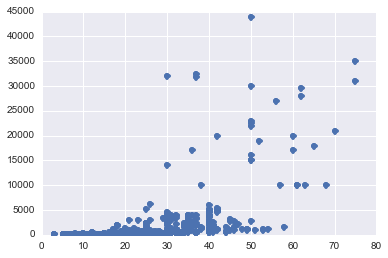

In [84]:
%matplotlib inline
import pprint
from pprint import pprint
import re
import os
from os import listdir
from os.path import isfile, join, walk
import csv
from storm.locals import *
import sqlite3
from collections import Counter
from matplotlib import pyplot as plt
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from statistics import mean, stdev
from scipy.stats import t
from scipy import stats


import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py


class Retailer(object):
    __storm_table__ = "RETAILER"
    RETAILER_ID = Int(primary=True)
    NAME = Unicode()
    TYPE = Unicode()
    CITY = Unicode()
    STATE = Unicode()
    COUNTRY = Unicode()
    SHIPPING_COST = Float()
    ADDITIONAL_COST = Float()
    
      
    def __init__(self, name, retailer_type, city, state, country, shipping_cost, additional_cost):
        # self.RETAILER_ID = int(retailer_id)
        self.NAME = u'' + name
        self.TYPE = u'' + retailer_type
        self.CITY = u'' + city
        self.STATE = u'' + state
        self.COUNTRY = u'' + country
        self.SHIPPING_COST = float(shipping_cost)
        self.ADDITIONAL_COST = float(additional_cost)

    def __str__(self):
        return 'Retailer[ RETAILER_ID = ' + str(self.RETAILER_ID) + ', NAME = ' + self.NAME + ', TYPE = ' + self.TYPE + ', CITY = ' + self.CITY + ', STATE = ' + self.STATE + ', COUNTRY = ' + self.COUNTRY + ', SHIPPING_COST = ' + str(self.SHIPPING_COST) + ', ADDITIONAL_COST = ' +  str(self.ADDITIONAL_COST) + ']'

    
class Distillery(object):
    __storm_table__ = "DISTILLERY"
    DISTILLERY_ID = Int(primary=True)
    NAME = Unicode()
    REGION = Unicode()
      
    def __init__(self, name, region):
        # self.DISTILLERY_ID = int(distillery_id)
        self.NAME = u'' + name
        self.REGION = u'' + region

    def __str__(self):
        return 'Distillery[ DISTILLERY_ID = ' + str(self.DISTILLERY_ID) + ', NAME = ' + self.NAME + ', REGION = ' + self.REGION + ']'

    
class Producer(object):
    __storm_table__ = "PRODUCER"
    PRODUCER_ID = Int(primary=True)
    NAME = Unicode()
      
    def __init__(self, name):
        # self.PRODUCER_ID = int(producer_id)
        self.NAME = u'' + name

    def __str__(self):
        return 'Producer[ PRODUCER_ID = ' + str(self.PRODUCER_ID) + ', NAME = ' + self.NAME + ']'

    
class Scotch(object):
    __storm_table__ = "SCOTCH"
    SCOTCH_ID = Int(primary=True)
    PRODUCER = Int()
    DISTILLERY = Int()
    NAME = Unicode()
    AGE = Int()
    
    def __init__(self, producer, distillery, name, age):
        # self.SCOTCH_ID = int(scotch_id)
        self.PRODUCER = int(producer)
        self.DISTILLERY = int(distillery)
        self.NAME = u'' + name
        self.AGE = int(age)

    def __str__(self):
        return 'Scotch[ SCOTCH_ID = ' + str(self.SCOTCH_ID) + ', PRODUCER = ' + str(self.PRODUCER) + ', DISTILLERY = ' + str(self.DISTILLERY) + ', NAME = ' + self.NAME + ', AGE = ' + str(self.AGE) + ']'

class Price(object):
    __storm_table__ = "PRICE"
    PRICE_ID = Int(primary=True)
    RETAILER = Int()
    SCOTCH = Int()
    PRICE = Float()
    
    def __init__(self, retailer, scotch, price):
        # self.SCOTCH_ID = int(scotch_id)
        self.RETAILER = int(retailer)
        self.SCOTCH = int(scotch)
        self.PRICE = float(price)

    def __str__(self):
        return 'Price[ PRICE_ID = ' + str(self.PRICE_ID) + ', RETAILER = ' + str(self.RETAILER) + ', SCOTCH = ' + str(self.SCOTCH) + ', PRICE = ' + str(self.PRICE) + ']'
    

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])


plt.plot(age, price, "o")





    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Outliers

When correlating age to price, we can see a pretty tight clustering in the sub-thousand dollar range in the 0-40 range, and tapering off a bit in the 50s. But the outliers really start around the 30 year range. This is where we see our shining stars, dollar-wise.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


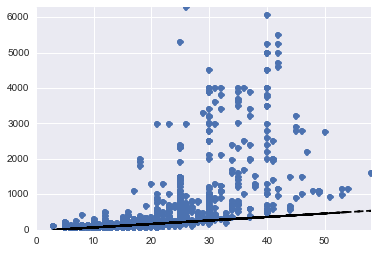

In [85]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 9000).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))




    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Tightening the Range

If we restrict our dollar value to under \$10,000, we start to see a clear pattern emerge.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


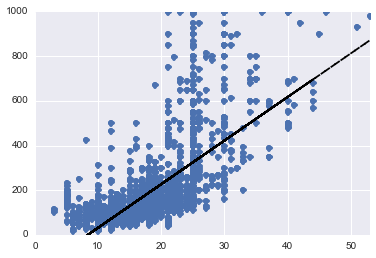

In [86]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 1001).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    
plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))


    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


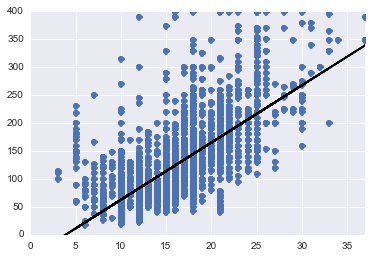

In [87]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 401).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    
plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))



    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Variance by Age

In [89]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)

for age in range(1, 80):
    print "Age: " + str(age)
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    
    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) < 2):
        continue
        
    mu = mean(price)
    sigma = stdev(price)
    n = len(price)
    maxPrice = max(price)
    minPrice = min(price)
    
    if (n < 10):
        continue
    print "n = " + str(n)
    print "mu = " + str(mu)
    print "sigma = " + str(sigma)
    print "max = " + str(maxPrice)
    print "min = " + str(minPrice)

    #Studnt, n=999, p<0.05, 2-tail
    #equivalent to Excel TINV(0.05,999)
    # print stats.t.ppf(1-0.025, n)
    
    print StudentTCI(mu, sigma, n)
    print StudentTCI(mu, sigma, n, 0.90)

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
Age: 1
Age: 2
Age: 3
Age: 4
Age: 5
n = 21
mu = 155.55047619
sigma = 46.1426121363
max = 229.95
min = 59.0
(59.591661159908142, 251.50929122104424)
(76.150903839720257, 234.95004854123209)
Age: 6
n = 13
mu = 71.2853846154
sigma = 30.7245723093
max = 129.99
min = 16.99
(4.90898161519101, 137.66178761557822)
(16.87421343542421, 125.69655579534501)
Age: 7
n = 23
mu = 87.287826087
sigma = 46.9101202452
max = 249.99
min = 37.95
(-9.7531511640326158, 184.32880333794566)
(6.889906635448412, 167.68574553846457)
Age: 8
n = 42
mu = 79.505
sigma = 63.591588961
max = 425.0
min = 26.99
(-48.828021771447908, 207.8380217714479)
(-27.453022871095214, 186.46302287109518)
Age: 9
n = 12
mu = 97.6508333333
sigma = 31.7365904276
max = 148.95
min = 29.99
(28.502742939889274, 166.79892372677739)
(41.087103155474551, 154.21456351119207)
Age: 10
n = 300
mu = 67.3255666667
sigma = 35.8328219809
max = 314.95
min = 18.99
(-3.1899

# Best Bargains by Age

In [91]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

cheap_scotch = []

for age in range(1, 80):
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Scotch.AGE > 0).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) == 0):
        continue
        
    minPrice = min(price)

    # XXX: Looks like this isn't matching on minPrice
    cheap_scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE == minPrice)
    cheapos = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in cheap_scotch_rs]

    if (len(cheapos) == 0):
        continue
    for j in range(0, len(cheapos)):
        cheap_scotch.append(cheapos[j])

for i in range(0, len(cheap_scotch)):
    print str(cheap_scotch[i][2]) + ": " + cheap_scotch[i][0] + ", " + cheap_scotch[i][1] + " - " + str(cheap_scotch[i][3]) + " [" + cheap_scotch[i][4] + "]"

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
3: Kilchoman, Kilchoman - 99.99 [Binnys]
5: James MacArthur, Bunnahabhain - 59.0 [Whiskey Shop USA]
6: Lismore, Lismore - 16.99 [Hi-Time Wine]
7: Signatory Vintage Scotch Whisky,  - 37.95 [Love Scotch]
7: Signatory Vintage Scotch Whisky,  - 37.95 [Love Scotch]
8: Ian Macleod Distillers,  - 26.99 [Hi-Time Wine]
9: Gordon & MacPhail, Miltonduff - 29.99 [Binnys]
10: Speyburn, Speyburn - 18.99 [Hi-Time Wine]
11: Gordon & MacPhail, Bunnahabhain - 49.99 [Beltramos]
11: Hart Brothers, Bowmore - 49.99 [Hi-Time Wine]
12: Glen Ness, Glen Ness - 22.99 [Ace Spirits]
13: Craigellachie, Craigellachie - 49.99 [Astor Wines and Spirits]
13: Craigellachie, Craigellachie - 49.99 [Caskers]
13: Craigellachie, Craigellachie - 49.99 [Hi-Time Wine]
13: Craigellachie, Craigellachie - 49.99 [Wine and Cheese Place]
14: Tullibardine, Tullibardine - 39.99 [Binnys]
15: Lismore, Lismore - 39.99 [Hi-Time Wine]
15: Lismore, Lismore -

# Most expensive by age

In [93]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


expensive_scotch = []

for age in range(1, 80):
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Scotch.AGE > 0).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) == 0):
        continue
        
    maxPrice = max(price)

    # XXX: Looks like this isn't matching on minPrice
    expensive_scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE == maxPrice)
    expensives = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in expensive_scotch_rs]

    if (len(expensives) == 0):
        continue
    for j in range(0, len(expensives)):
        expensive_scotch.append(expensives[j])

for i in range(0, len(expensive_scotch)):
    print str(expensive_scotch[i][2]) + ": " + expensive_scotch[i][0] + ", " + expensive_scotch[i][1] + " - " + str(expensive_scotch[i][3]) + " [" + expensive_scotch[i][4] + "]"

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
3: Bruichladdich, Bruichladdich - 114.95 [Love Scotch]
5: Bruichladdich, Bruichladdich - 229.95 [Love Scotch]
6: Bruichladdich, Bruichladdich - 129.99 [D&M]
7: Bruichladdich, Bruichladdich - 249.99 [Binnys]
8: Macallan, Macallan - 425.0 [Love Scotch]
9: Springbank, Springbank - 148.95 [Love Scotch]
10: Bruichladdich, Bruichladdich - 314.95 [Love Scotch]
11: Gordon & MacPhail, Mortlach - 170.0 [Whiskey Shop USA]
12: Glendronach, Glendronach - 500.0 [Love Scotch]
13: Signatory Vintage Scotch Whisky, Glen Grant - 184.5 [Whiskey Shop USA]
13: Signatory Vintage Scotch Whisky, Glen Grant - 184.5 [Whiskey Shop USA]
14: Caol Ila, Caol Ila - 199.99 [Hi-Time Wine]
15: Laphroaig, Laphroaig - 375.0 [Love Scotch]
16: Scotch Malt Whisky Society,  - 500.0 [Love Scotch]
17: Springbank, Springbank - 1100.0 [Hi-Time Wine]
18: Macallan, Macallan - 1999.99 [K&L Wines]
19: Ardbeg, Ardbeg - 670.0 [Whiskey Shop USA]
20: Mac